## Ecommerce Data Analysis using Linear Regression

A quick exploration into some data for a fake ecommerce company to practice using linear regression. [Datasource](https://github.com/meetnandu05/ml1/blob/master/Ecommerce%20Customers)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
sns.set_style('whitegrid')

### Read and inspect the data

In [3]:
ecom = pd.read_csv("Ecommerce Customers")

In [4]:
ecom.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [5]:
ecom.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [6]:
ecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [7]:
ecom.corr()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


Data looks to be of high quality. Nothing troubling from first inspection. There are a couple of correlations that are worth investigating too.

### Data munging

Not a great deal required. However it may be possible to get some extra out of the "Address" field.

In [8]:
import re

In [9]:
def get_state(address):
    state_rgx = re.search(r'([a-zA-Z]{2}) (\d+-*\d+)$', address)
    return state_rgx.group(1)

In [10]:
ecom['State'] = ecom['Address'].apply(
    get_state
)
ecom.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,State
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054,MI
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933,CA
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505,DC
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344,OH
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092,PR


In [11]:
states = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}

In [12]:
ecom['State'] = ecom['State'].map(states)

In [13]:
ecom

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,State
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054,Michigan
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933,California
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505,District of Columbia
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344,Ohio
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092,Puerto Rico
...,...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438,Utah
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004,California
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145,Tennessee
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510,Texas


### Exploratory Data Analysis

The figure that this company will ultimately be interested in is the "Yearly Amount Spent". This is the number they will want to maximise to increase profit. The rest of the numbers are supporting data.

Are there any geographical relationships that can be seen?

In [52]:
gp_state = ecom.groupby('State')

h_avg = gp_state.mean()['Yearly Amount Spent'].sort_values().tail(5).index
l_avg = gp_state.mean()['Yearly Amount Spent'].sort_values().head(5).index

h_avg

Index(['Minnesota', 'Arkansas', 'Indiana', 'Northern Mariana Islands', 'Utah'], dtype='object', name='State')

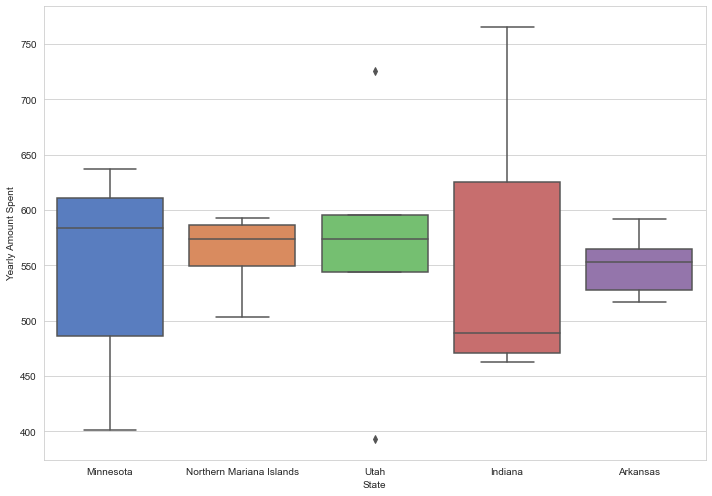

In [43]:
plt.figure(figsize=(10,7))
sns.boxplot(
    x='State',
    y='Yearly Amount Spent',
    data=ecom[ecom['State'].isin(h_avg)],
    palette='muted'
)
plt.tight_layout()

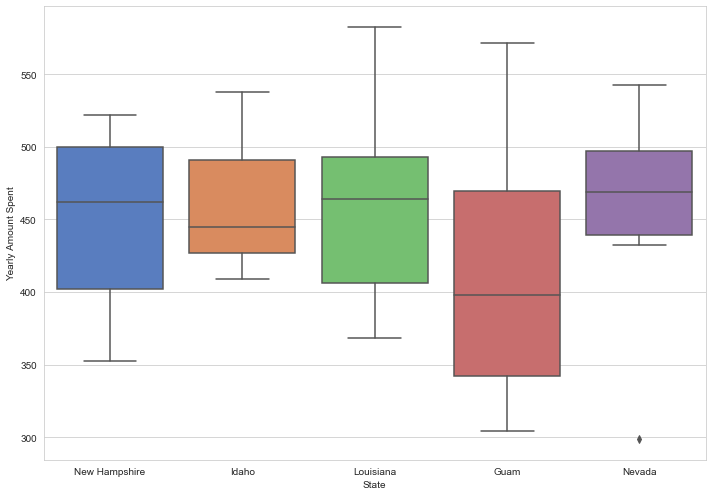

In [44]:
plt.figure(figsize=(10,7))
sns.boxplot(
    x='State',
    y='Yearly Amount Spent',
    data=ecom[ecom['State'].isin(l_avg)],
    palette='muted'
)
plt.tight_layout()

It appears from quickly looking up these states that 3/5 states with the highest Average Spend are in the Upper Midwest of the United States. Is this something that can be targeted by the company?

- Would specific lines/styles targeted at this area sell better? (E.g. a big push on winter wear)
- Can any marketing insight be gained from this?
- Does the companies brand hold any significance with these states? 

Does the customer channel have any impact on the customer value?

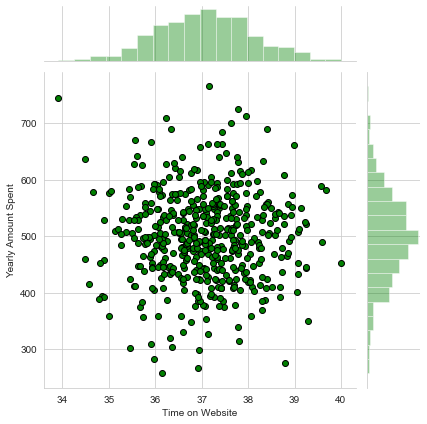

In [61]:
sns.jointplot(
    x='Time on Website',
    y='Yearly Amount Spent',
    data=ecom,
    color='g',
    joint_kws={'edgecolor': 'black'}
)

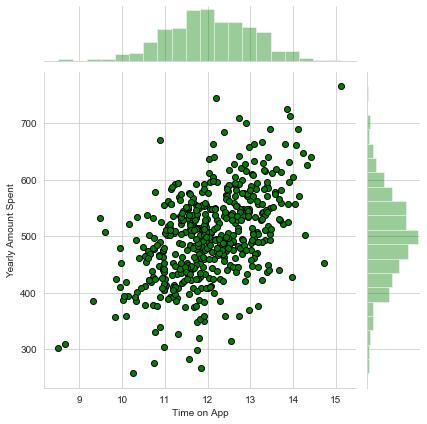

In [62]:
sns.jointplot(
    x='Time on App',
    y='Yearly Amount Spent',
    data=ecom,
    color='g',
    joint_kws={'edgecolor': 'black'}
)

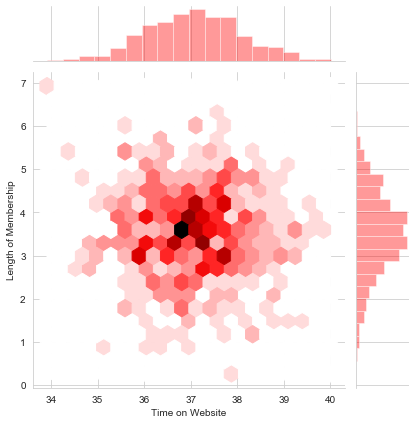

In [19]:
sns.jointplot(
    x='Time on Website',
    y='Length of Membership',
    data=ecom,
    color='r',
    kind='hex'
)

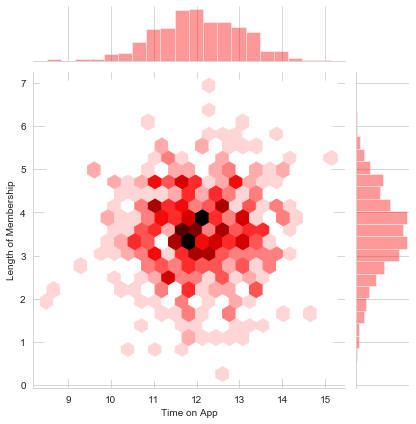

In [20]:
sns.jointplot(
    x='Time on App',
    y='Length of Membership',
    data=ecom,
    color='r',
    kind='hex'
)

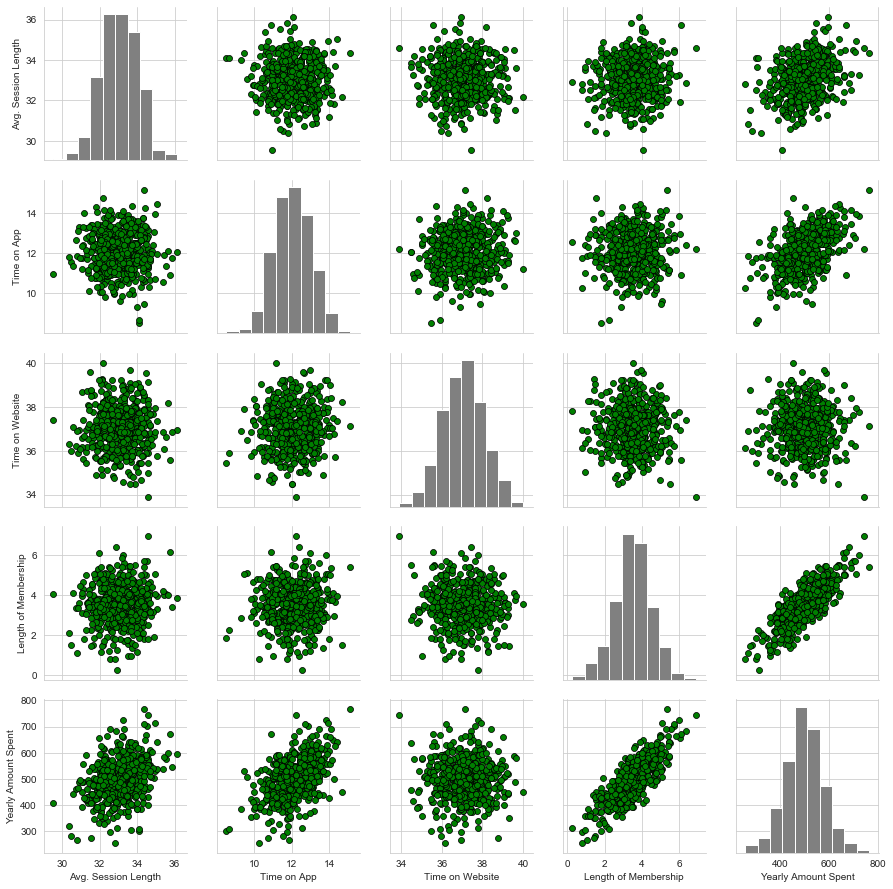

In [63]:
sns.pairplot(
    ecom,
    plot_kws={'color':'green'},
    diag_kws={'color':'grey'}
)

Based on this information, it appears Avg. Session length has a weak correlation with Amount Spent. Time on App has a slightly stronger correlation. But there is noticable positive correlation between Length of Membership and Amount Spent. Long standing customers are undeniably bigger spenders!

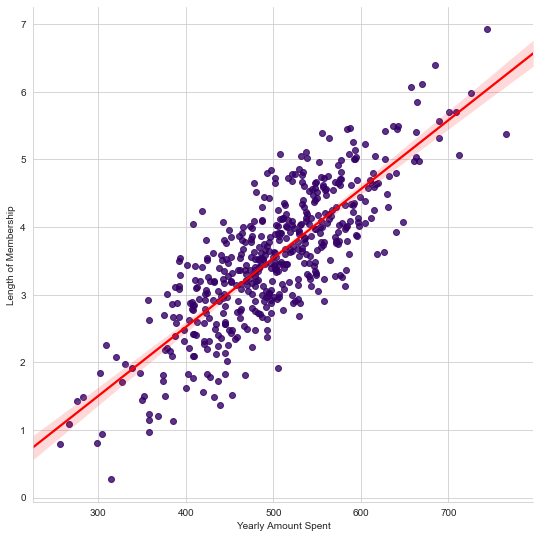

In [66]:
p = sns.lmplot(
    x='Yearly Amount Spent',
    y='Length of Membership',
    data=ecom,
    line_kws={'color': 'red'},
    scatter_kws={'color': '#330066'}
)
p.fig.set_size_inches(8,8)

### Training and Testing Data

Create dependant and independant variables. Then create the testing & training data for each of these variables.

In [23]:
y = ecom['Yearly Amount Spent']
y.head()

0    587.951054
1    392.204933
2    487.547505
3    581.852344
4    599.406092
Name: Yearly Amount Spent, dtype: float64

In [24]:
X = ecom[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
X.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,34.497268,12.655651,39.577668,4.082621
1,31.926272,11.109461,37.268959,2.664034
2,33.000915,11.330278,37.110597,4.104543
3,34.305557,13.717514,36.721283,3.120179
4,33.330673,12.795189,37.536653,4.446308


In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
)

In [27]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 18 to 259
Data columns (total 4 columns):
Avg. Session Length     150 non-null float64
Time on App             150 non-null float64
Time on Website         150 non-null float64
Length of Membership    150 non-null float64
dtypes: float64(4)
memory usage: 5.9 KB


### Training the Model

Create and train the model. See if the model corresponds with insights from data exploration.

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
lm = LinearRegression()

In [30]:
lm.fit(
    X_train,
    y_train
)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
lm.intercept_

-1047.9327822502385

In [32]:
lm.coef_

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

In [33]:
cdf = pd.DataFrame(
    data=lm.coef_,
    index=X.columns,
    columns=['Coefficient']
)
cdf

,Coef
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


This supports the conclusions drawn earlier during the data analysis phase. Length of Membership has the strongest correlation with Amount Spent, Time on Website has the weakest correlation. This suggests the model is (roughly) a suitable fit.

### Predicting Test Data

Test the model more thoroughly to see if it fits.

In [34]:
predictions = lm.predict(X_test)
predictions[:10]

array([456.44186104, 402.72005312, 409.2531539 , 591.4310343 ,
       590.01437275, 548.82396607, 577.59737969, 715.44428115,
       473.7893446 , 545.9211364 ])

** Create a scatterplot of the real test values versus the predicted values. **

Text(0, 0.5, 'Predictions')

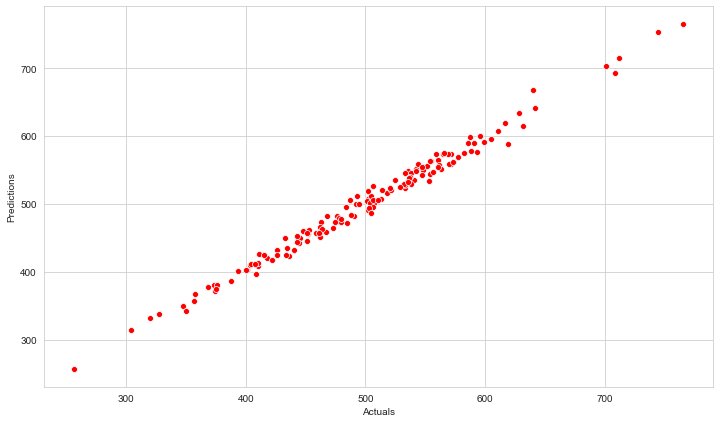

In [35]:
fig, ax = plt.subplots(figsize=(12, 7))
sns.scatterplot(
    x=y_test,
    y=predictions,
    color='r'
)
ax.set_xlabel('Actuals')
ax.set_ylabel('Predictions')

### Evaluating the Model

Look at residuals as an indicator of how well the model works. An even distribution with a small spread and no outliers is a very good sign.

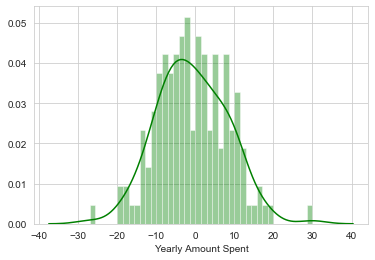

In [71]:
sns.distplot(
    y_test - predictions,
    bins=40,
    color='g'
)

In [68]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score
from math import sqrt

In [69]:
metrics = {
    'MAE': mean_absolute_error(y_test, predictions),
    'MSE': mean_squared_error(y_test, predictions),
    'RMSE': sqrt(mean_squared_error(y_test, predictions)),
    'EVS': explained_variance_score(y_test, predictions)
}

In [70]:
for k, v in metrics.items():
    print(f'{k}: {v}')

MAE: 7.228148653430838
MSE: 79.81305165097461
RMSE: 8.933815066978642
EVS: 0.9890771231889606


This model is *very* tight. On average predictions are correct to within £10, even using the Root Mean Squared Errors (which punishes errors a lot more).

### Conclusion

In [40]:
cdf

,Coef
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


### A few recommendations based on the data...

- Invest effort in building relationships with existing customers through retention schemes (e.g. loyalty cards, customer rewards).
- Keep trust and reputation at the heart of the business. Losing customers will turn out to be costly.
- If technology investment is important to the business, focus efforts on the app over the website.

Is there any correlation between Length of Membership and any of the other factors? This could help form further recommendations.

Text(0, 0.5, 'Time on Website')

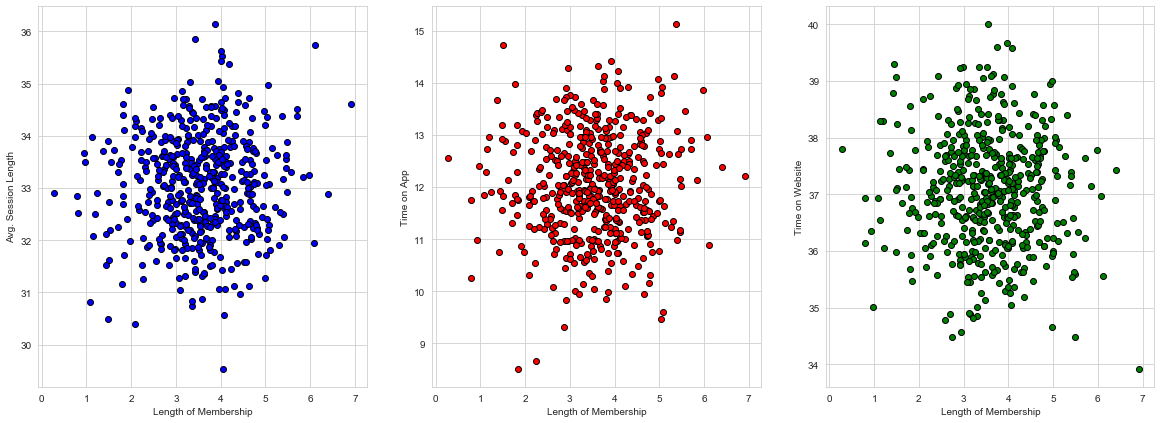

In [41]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 7))

for a in ax:
    a.set_xlabel('Length of Membership')

ax[0].scatter(
    'Length of Membership', 
    'Avg. Session Length',
    data=ecom,
    c='b',
    edgecolors='black'
)
ax[0].set_ylabel('Avg. Session Length')

ax[1].scatter(
    'Length of Membership', 
    'Time on App',
    data=ecom,
    c='r',
    edgecolors='black'
)
ax[1].set_ylabel('Time on App')

ax[2].scatter(
    'Length of Membership', 
    'Time on Website',
    data=ecom,
    c='g',
    edgecolors='black'
)
ax[2].set_ylabel('Time on Website')

There doesn't appear to be any strong correlation between these measures and the length of a customers lifecycle based on these numbers. More data is required to answer "What makes a customer stay for longer?"

## The End